## Import

In [1]:
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt

In [2]:
output_path = "output/no_scvi"

## Load

In [3]:
adata = sc.read_h5ad(os.path.join(output_path, 'adata_niche_embedding.h5ad'))

In [4]:
adata.X = adata.layers['norm'].copy()

## Visualization

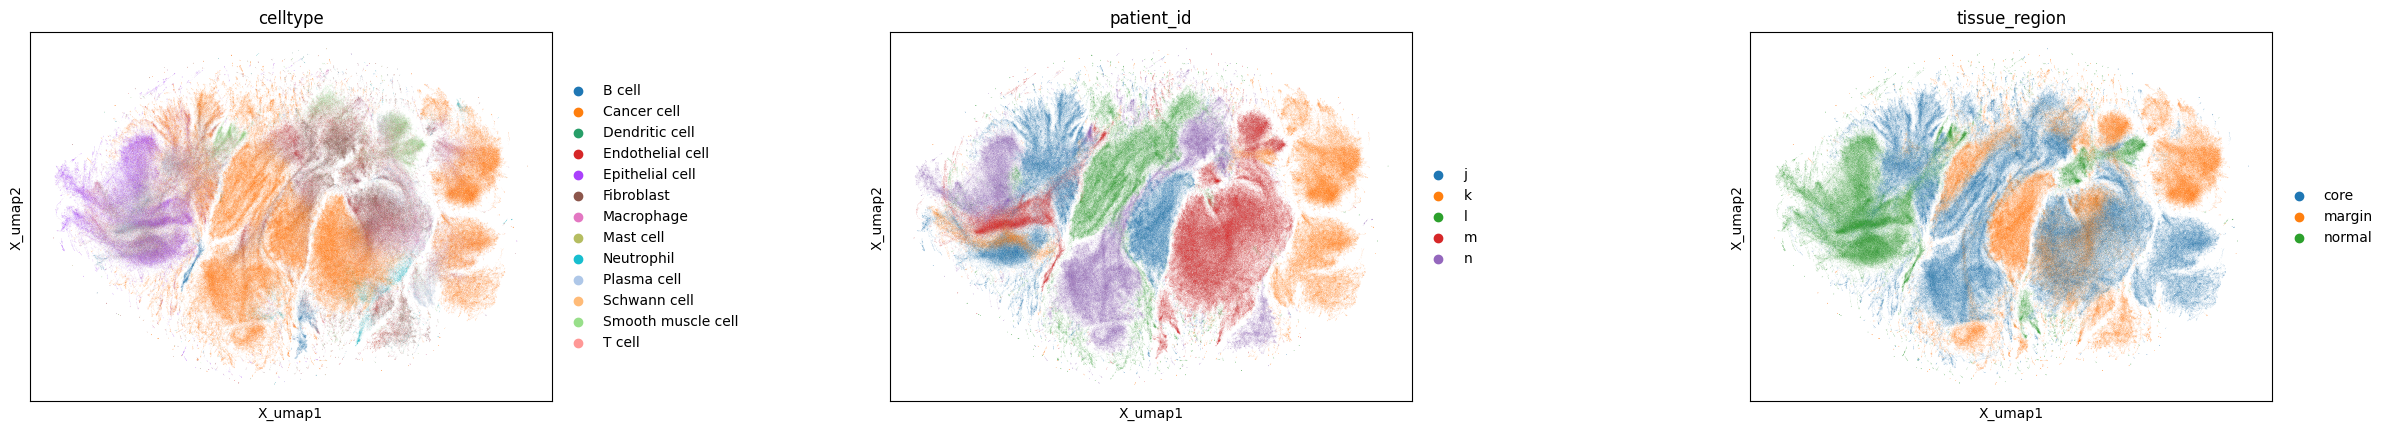

In [5]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["celltype","patient_id","tissue_region"],
    wspace=0.5
)

In [ ]:
# already at this I point I would say that not using scvi as input in the wasserwormhole model is creating representations that strongly reflect the samples
# which will probably lead to niches that also reflect the samples rather than a funcionalization

## Niches

In [6]:
key = 'wormhole_neighbors'
n_iterations = 5
resolutions = [float(x) for x in '0.05,0.1,0.15,0.2'.split(',')]

In [7]:
for res in resolutions:
    sc.tl.leiden(adata, resolution=res, neighbors_key=key, key_added=key+'_leiden_'+str(res), n_iterations=n_iterations)

IOStream.flush timed out
IOStream.flush timed out


In [9]:
adata.write(os.path.join(output_path, 'adata_niche_embedding_clusters.h5ad'))

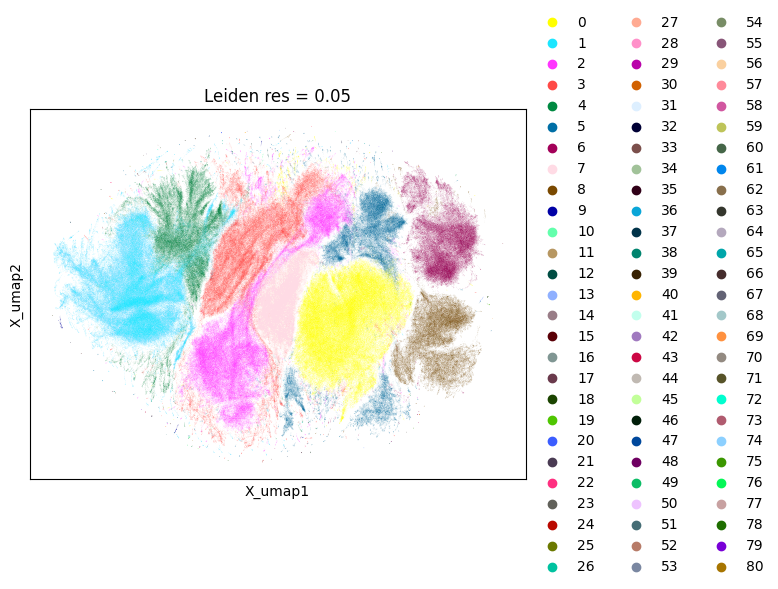

In [12]:
res = 0.05
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=f"{key}_leiden_{res}",
    title=f"Leiden res = {res}",
)

In [ ]:
# as predicted, niches as sample-specific, which is something we don't want